In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
F = 7
L = 5

## Excercise 1 -  Generated Quantities Block

In [4]:
%%writefile home/code_1.stan
data {
    int M;
}

generated quantities {
    real lambda=abs(normal_rng(0, 121));
    array [M] int y_sim;
    for (k in 1:M) {
        y_sim[k] = poisson_rng(lambda);
    }
}


Overwriting home/code_1.stan


In [5]:
gen_quant = CmdStanModel(stan_file='home/code_1.stan')

INFO:cmdstanpy:compiling stan file /home/code_1.stan to exe file /home/code_1
INFO:cmdstanpy:compiled model executable: /home/code_1


In [6]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1,
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [7]:
samples.draws().shape

(1000, 1, 10)

In [8]:
samples.draws_pd()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,106.8100,97.0,107.0,119.0,97.0,107.0,109.0,111.0
1,0.0,0.0,37.7221,50.0,32.0,41.0,27.0,41.0,33.0,39.0
2,0.0,0.0,75.7833,76.0,68.0,72.0,88.0,86.0,76.0,74.0
3,0.0,0.0,22.3972,19.0,27.0,30.0,23.0,19.0,19.0,18.0
4,0.0,0.0,143.2200,135.0,144.0,151.0,137.0,157.0,146.0,133.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,93.4535,99.0,94.0,81.0,95.0,98.0,103.0,106.0
996,0.0,0.0,128.7080,114.0,123.0,143.0,122.0,135.0,122.0,123.0
997,0.0,0.0,155.5770,147.0,144.0,162.0,152.0,136.0,146.0,143.0
998,0.0,0.0,87.7448,81.0,71.0,92.0,89.0,96.0,86.0,84.0


In [9]:
samples_columns_names = samples.column_names[2:]
df = pd.DataFrame((samples.draws()[:, :, 2:]).reshape(1000, 8), columns=samples_columns_names)
df

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,106.8100,97.0,107.0,119.0,97.0,107.0,109.0,111.0
1,37.7221,50.0,32.0,41.0,27.0,41.0,33.0,39.0
2,75.7833,76.0,68.0,72.0,88.0,86.0,76.0,74.0
3,22.3972,19.0,27.0,30.0,23.0,19.0,19.0,18.0
4,143.2200,135.0,144.0,151.0,137.0,157.0,146.0,133.0
...,...,...,...,...,...,...,...,...
995,93.4535,99.0,94.0,81.0,95.0,98.0,103.0,106.0
996,128.7080,114.0,123.0,143.0,122.0,135.0,122.0,123.0
997,155.5770,147.0,144.0,162.0,152.0,136.0,146.0,143.0
998,87.7448,81.0,71.0,92.0,89.0,96.0,86.0,84.0


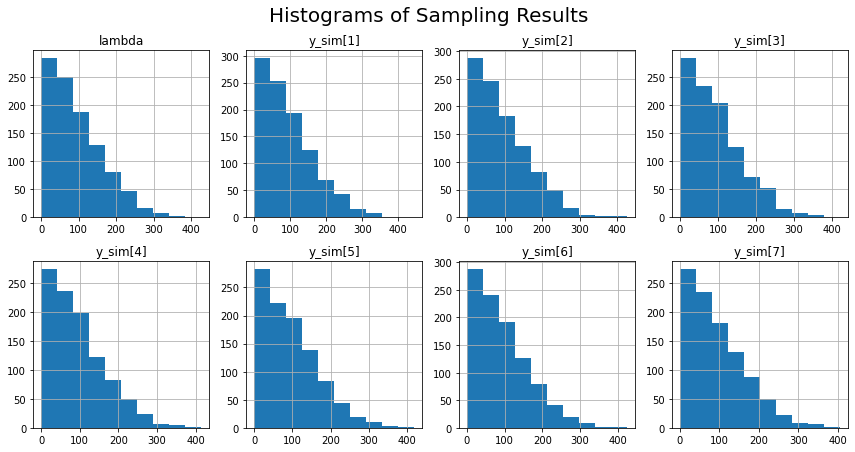

In [10]:
df.hist(figsize=(12, 6), layout=(2, 4))
plt.tight_layout()
plt.suptitle('Histograms of Sampling Results', y=1.04, fontsize=20)
plt.show()

## Excercise 2 - Constraints on the data 

In [11]:
%%writefile home/code_2.stan
data {
    int N;
    array [N] int y;
}

parameters {
    real<lower=0,upper=1> theta;
}
model {
    theta ~ beta(1,1);
    y ~ bernoulli(theta);
}

Overwriting home/code_2.stan


In [12]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /home/code_2.stan to exe file /home/code_2
INFO:cmdstanpy:compiled model executable: /home/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 11, column 4 to column 25)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/code_2', 'id=1', 'random', 'seed=51027', 'data', 'file=/tmp/tmpxprcpdup/qmndolf6.json', 'output', 'file=/tmp/tmpxprcpdup/code_2-20240319192215_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxprcpdup/code_2-20240319192215_1.csv
 console_msgs (if any):
	/tmp/tmpxprcpdup/code_2-20240319192215_0-stdout.txt

In [13]:
%%writefile home/code_3.stan
data {
    int<lower=1> N;
    array [N] int<lower=0, upper=1> y;
}

parameters {
    real<lower=0,upper=1> theta;
}
model {
    theta ~ beta(1,1);
    y ~ bernoulli(theta);
}

Overwriting home/code_3.stan


In [14]:
bern2 = CmdStanModel(stan_file='home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /home/code_3.stan to exe file /home/code_3


INFO:cmdstanpy:compiled model executable: /home/code_3
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 38)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 38)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 38)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 38)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/code_3', 'id=1', 'random', 'seed=28250', 'data', 'file=/tmp/tmpxprcpdup/i2u2em7p.json', 'output', 'file=/tmp/tmpxprcpdup/code_3-20240319192304_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxprcpdup/code_3-20240319192304_1.csv
 console_msgs (if any):
	/tmp/tmpxprcpdup/code_3-20240319192304_0-stdout.txt

In a Bernoulli distribution, the outcome 'y' can only take values of 0 or 1, representing a binary outcome (success or failure). In this case 'y' is specified as '[0, 2]' therefore it goes beoynd the upper boundary. Constraints on data refer to the limitations on the values that the input data can take in a model. They ensure that the data provided to the model are valid and consistent with the requirements of the model. 

In [62]:
bern1 = CmdStanModel(stan_file='home/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
samp_bern1.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-3.00440,0.961181,1.00121,1.0,1.0,0.0,3.02779,0.334592
1,-4.41646,0.769028,1.00121,2.0,3.0,0.0,4.57931,0.874306
2,-2.77491,0.993127,1.00121,2.0,3.0,0.0,4.24884,0.482985
3,-2.83887,0.974983,1.00121,2.0,3.0,0.0,2.88000,0.590272
4,-2.83887,0.803053,1.00121,1.0,3.0,0.0,3.49508,0.590272
...,...,...,...,...,...,...,...,...
3995,-2.82131,0.950027,1.15627,2.0,3.0,0.0,2.99717,0.422436
3996,-2.77691,1.000000,1.15627,1.0,1.0,0.0,2.80540,0.476759
3997,-2.94825,0.953263,1.15627,1.0,3.0,0.0,2.95076,0.355014
3998,-3.27403,0.730406,1.15627,2.0,3.0,0.0,4.50033,0.735458


In [63]:
bern2 = CmdStanModel(stan_file='home/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
samp_bern2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-3.76736,1.000000,1.17712,2.0,3.0,0.0,5.60390,0.186998
1,-8.55259,0.634777,1.17712,2.0,3.0,0.0,9.36482,0.014093
2,-8.15159,1.000000,1.17712,2.0,3.0,0.0,9.07466,0.017277
3,-7.80442,1.000000,1.17712,1.0,1.0,0.0,8.68745,0.020623
4,-3.24539,1.000000,1.17712,2.0,3.0,0.0,6.34522,0.729422
...,...,...,...,...,...,...,...,...
3995,-2.78149,1.000000,1.06849,1.0,3.0,0.0,2.91833,0.466674
3996,-2.90101,0.814526,1.06849,2.0,3.0,0.0,3.65293,0.624695
3997,-2.90101,0.910333,1.06849,1.0,3.0,0.0,3.35396,0.624695
3998,-2.83092,1.000000,1.06849,1.0,1.0,0.0,2.88877,0.584769


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [15]:
%%writefile home/code_4.stan
parameters {
    real theta;
}

model {
    theta ~ gamma(1.25, 1.25);
}


Overwriting home/code_4.stan


In [16]:
model_gm1 = CmdStanModel(stan_file='home/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /home/code_4.stan to exe file /home/code_4
INFO:cmdstanpy:compiled model executable: /home/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status





chain 1 |██▏       | 00:00 Iteration: 1300 / 7000 [ 18%]  (Sampling)


chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)

chain 1 |█████     | 00:00 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |██████▎   | 00:00 Iteration: 4200 / 7000 [ 60%]  (Sampling)




chain 1 |███████▌  | 00:00 Iteration: 5100 / 7000 [ 72%]  (Sampling)
chain 1 |████████▊ | 00:00 Iteration: 6000 / 7000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 6900 / 7000 [ 98%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed    

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20240319192343_1.csv, /samples/code_4-20240319192343_2.csv, /samples/code_4-20240319192343_3.csv, /samples/code_4-20240319192343_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

In [17]:
out_gamma1.draws().shape

(6000, 4, 8)

In [18]:
out_gamma1.draws_pd().shape

(24000, 8)

In [19]:
out_gamma1.draws_pd()['theta']

0        2.605520
1        3.285610
2        3.637090
3        3.555540
4        5.203460
           ...   
23995    0.173249
23996    0.091863
23997    0.091863
23998    0.091863
23999    0.091863
Name: theta, Length: 24000, dtype: float64

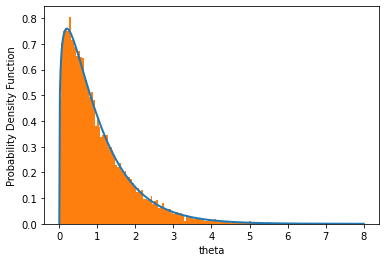

In [20]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma1.draws_pd()['theta'], density=True, bins=160)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Diagnostic message from code_4.stan tells that HMC (Hamiltonian Monte Carlo) wasn't fully able to generate proper samples for the posterior distribustion - 39.54% of samples may be inaccurate. 

### Constrained parameter

In [21]:
%%writefile home/code_5.stan
parameters {
    real<lower=0> theta;
}

model {
    theta ~ gamma(1.25, 1.25);
}

Overwriting home/code_5.stan


In [22]:
model_gm2 = CmdStanModel(stan_file='home/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/code_5.stan to exe file /home/code_5
INFO:cmdstanpy:compiled model executable: /home/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)


chain 1 |██████▊   | 00:00 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20240319192438_1.csv, /samples/code_5-20240319192438_2.csv, /samples/code_5-20240319192438_3.csv, /samples/code_5-20240319192438_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

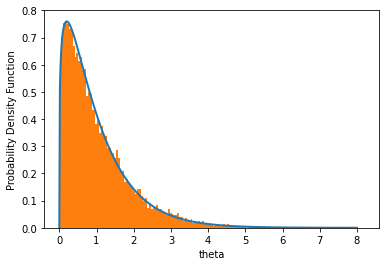

In [23]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma2.draws_pd()['theta'], density=True, bins=160)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Once constraints are added, there is no longer divergence when generating samples.

## Excercise 4 -  Selection of parameters using equation solving



In [32]:
%%writefile home/code_6.stan
functions {
    vector tail_delta(vector y, vector theta, array [] real x_r, array [] int x_i) {
        vector[1] deltas;
        deltas[1] = 2 * (normal_cdf(theta[1] | 0, exp(y[1])) - 0.5) - 0.99;
        return deltas;
    }
}
data {
    vector[1] y_guess;
    vector[1] theta;
}

transformed data {
    vector[1] y;
    array [0] real x_r;
    array [0] int x_i;
    
    y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i);
    
    print("Standard deviation = ", exp(y[1]));
}

generated quantities {
    real sigma = exp(y[1]);
}

Overwriting home/code_6.stan


In [33]:
model_tune = CmdStanModel(stan_file='home/code_6.stan')

F = 7# number of letters in the first name
L = 5# number of letters in the last name
y0 = 1# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=1, chains = 1)

INFO:cmdstanpy:compiling stan file /home/code_6.stan to exe file /home/code_6
INFO:cmdstanpy:compiled model executable: /home/code_6
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [45]:
print(f"Standard deviation of half normal distribution, such that with 99% probability samples from it will be less than (7+5)/2=6 is equal to = {tunes.draws_pd()['sigma'].values[0]}")

Standard deviation of half normal distribution, such that with 99% probability samples from it will be less than (7+5)/2=6 is equal to = 2.32935


## Excercise 5 - different methods of defining models


In [46]:
%%writefile home/code_7.stan
data {
    int<lower=1> N;
}

parameters {
    array [N] real y;
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}


Overwriting home/code_7.stan


In [47]:
%%writefile home/code_8.stan
data {
    int<lower=1> N;
}

parameters {
    array [N] real y;
    real theta;
}

model {
    target += normal_lpdf(y | theta, 1);
    target += normal_lpdf(theta | 0, 1);
}

Overwriting home/code_8.stan


In [48]:
%%writefile home/code_9.stan
data {
    int<lower=1> N;
}

parameters {
    array [N] real y;
    real theta;
}

model {
    for (n in 1:N) {
     target += normal_lpdf(y[n] | theta, 1);   
    }
    target += normal_lpdf(theta | 0, 1);
}

Overwriting home/code_9.stan


In [49]:
model_samp_st = CmdStanModel(stan_file='home/code_7.stan')

INFO:cmdstanpy:compiling stan file /home/code_7.stan to exe file /home/code_7
INFO:cmdstanpy:compiled model executable: /home/code_7


In [50]:
model_log_target = CmdStanModel(stan_file='home/code_8.stan')

INFO:cmdstanpy:compiling stan file /home/code_8.stan to exe file /home/code_8
INFO:cmdstanpy:compiled model executable: /home/code_8


In [51]:
model_log_target_ind = CmdStanModel(stan_file='home/code_9.stan')

INFO:cmdstanpy:compiling stan file /home/code_9.stan to exe file /home/code_9
INFO:cmdstanpy:compiled model executable: /home/code_9


In [53]:
F = 5
data = {'N': F}
seed = 13082000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


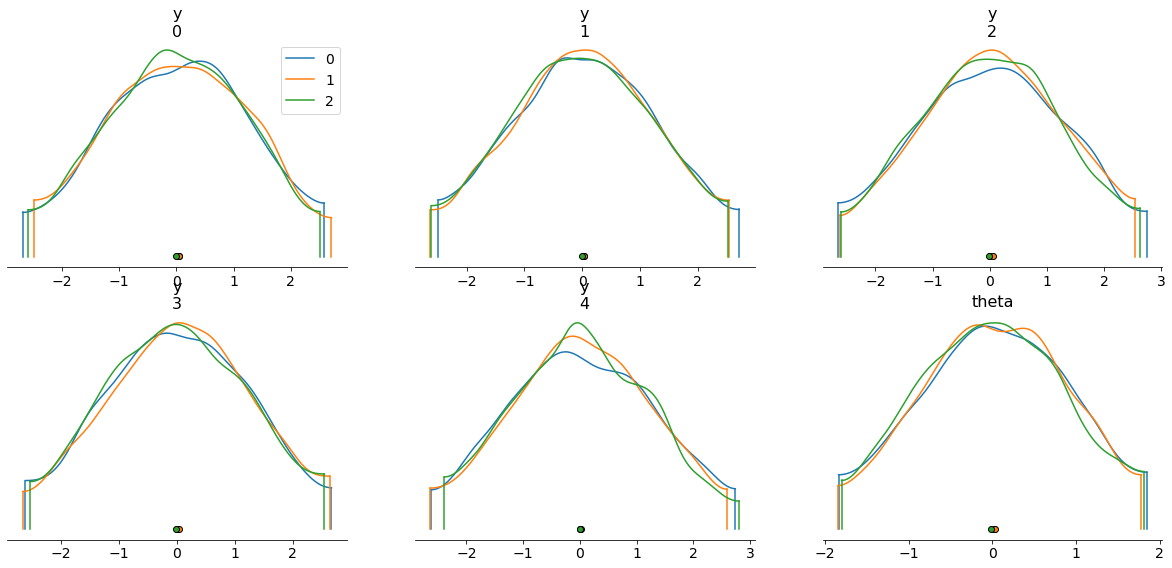

In [54]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [55]:
%%writefile home/code_10.stan
data {
    int<lower=1> N;
}

parameters {
    array [N] real y;
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}

generated quantities {
    real mean_y = mean(y);
}

Writing home/code_10.stan


In [56]:
model_gq = CmdStanModel(stan_file='home/code_10.stan')
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)


INFO:cmdstanpy:compiling stan file /home/code_10.stan to exe file /home/code_10
INFO:cmdstanpy:compiled model executable: /home/code_10
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
mean_of_y.draws_pd()

,mean_y
0,-2.364560
1,-1.240020
2,-1.146600
3,0.038987
4,0.102304
...,...
3995,0.657019
3996,-0.720514
3997,-0.494515
3998,-1.262370


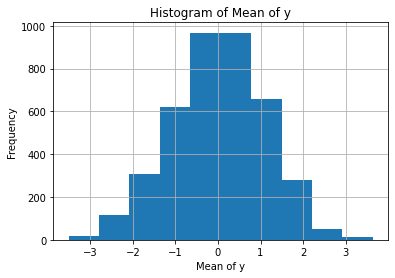

In [61]:
mean_of_y.draws_pd().hist()
plt.title( "Histogram of Mean of y")
plt.xlabel("Mean of y")
plt.ylabel("Frequency")
plt.show()